# Focus: Fractal Dimension

In [1]:
import kagglehub
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import pearsonr

%matplotlib inline
pd.set_option('display.max_columns', None)

data = pd.read_csv(r'cleaned_data.csv')
df = data.copy()


c:\ProgramData\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Specifying only fractal dimension related columns

In [2]:
df_fractal_dimension = df[['id', 'diagnosis','fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst' ]]

### Defining a new value column

Idea: Add a new value for the difference between mean fractal dimension and fractal dimension at worst to explore possible correlation focusing the change of size

In [3]:
# defining a new measure for the difference between the mean and the worst fractal_dimension
df_fractal_dimension = df_fractal_dimension.assign( fractal_dimension_diff = lambda x: (x['fractal_dimension_worst'] - x['fractal_dimension_mean'] ))
df_fractal_dimension

,id,diagnosis,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst,fractal_dimension_diff
0,842302,M,0.07871,0.006193,0.11890,0.04019
1,842517,M,0.05667,0.003532,0.08902,0.03235
2,84300903,M,0.05999,0.004571,0.08758,0.02759
3,84348301,M,0.09744,0.009208,0.17300,0.07556
4,84358402,M,0.05883,0.005115,0.07678,0.01795
...,...,...,...,...,...,...
564,926424,M,0.05623,0.004239,0.07115,0.01492
565,926682,M,0.05533,0.002498,0.06637,0.01104
566,926954,M,0.05648,0.003892,0.07820,0.02172
567,927241,M,0.07016,0.006185,0.12400,0.05384


In [4]:
# filtering the DataFrame by diagnosis
df_M = df_fractal_dimension[df_fractal_dimension['diagnosis'] == 'M']
df_B = df_fractal_dimension[df_fractal_dimension['diagnosis'] == 'B']

Variables for plots

In [5]:
# fractal_dimension variables to analyze
fractal_dimension_vars = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst', 'fractal_dimension_diff']

### fractal dimension histograms and overview

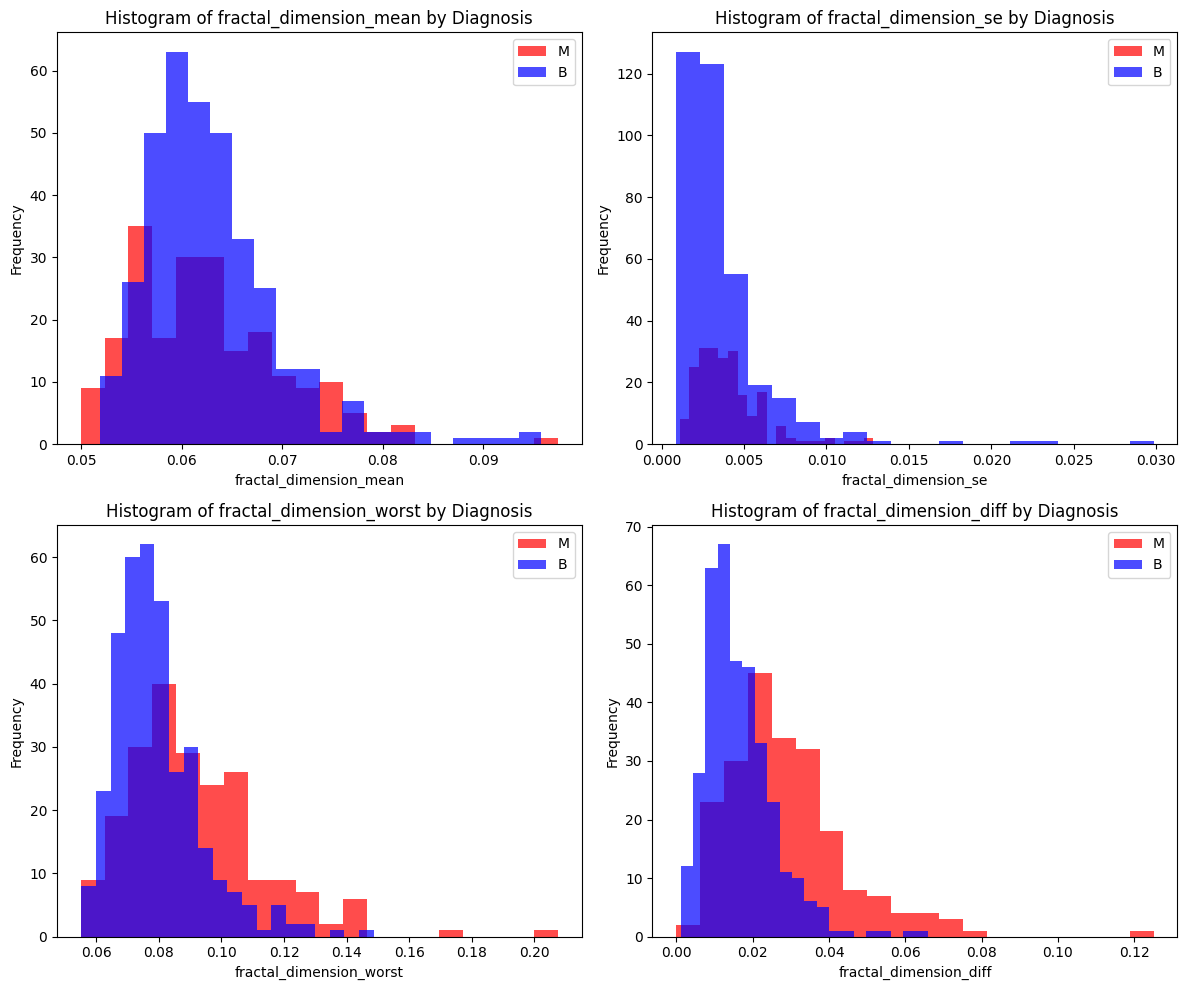

In [6]:
# 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# loop through each fractal_dimension variable and plot overlapping histograms for "M" and "B"
for i, var in enumerate(fractal_dimension_vars):
    ax = axes[i // 2, i % 2]
    # filtering data by diagnosis
    data_M = df_fractal_dimension[df_fractal_dimension['diagnosis'] == 'M'][var]
    data_B = df_fractal_dimension[df_fractal_dimension['diagnosis'] == 'B'][var]
    
    # plot overlapping histograms with same style and colors:
    # diagnosis M in red and diagnosis B in blue, with alpha=0.7
    ax.hist(data_M, bins=20, alpha=0.7, label='M', color='red')
    ax.hist(data_B, bins=20, alpha=0.7, label='B', color='blue')
    
    ax.set_title(f"Histogram of {var} by Diagnosis")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.savefig('plots/histo_fractal.png')
plt.show()


### Closer look at the overlapping regions

C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\1293641814.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_overlap.groupby(var + '_bin')['diagnosis'].count()
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\1293641814.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_cancer = df_overlap.groupby(var + '_bin')['diagnosis'].apply(lambda x: (x == 'M').sum() / len(x))
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\1293641814.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

fractal_dimension_mean_bin
(0.0508, 0.0562]    0.513158
(0.0562, 0.0606]    0.270968
(0.0606, 0.065]     0.335443
(0.065, 0.0694]     0.362637
(0.0694, 0.0738]    0.414634
(0.0738, 0.0782]    0.608696
(0.0782, 0.0826]    0.555556
(0.0826, 0.087]     0.000000
(0.087, 0.0914]     0.000000
(0.0914, 0.0958]    0.000000
Name: diagnosis, dtype: float64
fractal_dimension_se_bin
(9.000000000000002e-05, 0.00226]    0.234043
(0.00226, 0.00344]                  0.358382
(0.00344, 0.00461]                  0.495726
(0.00461, 0.00579]                  0.446429
(0.00579, 0.00696]                  0.500000
(0.00696, 0.00814]                  0.470588
(0.00814, 0.00931]                  0.400000
(0.00931, 0.0105]                   0.375000
(0.0105, 0.0117]                    0.500000
(0.0117, 0.0128]                    0.500000
Name: diagnosis, dtype: float64
fractal_dimension_worst_bin
(0.0542, 0.0645]    0.261905
(0.0645, 0.0739]    0.181818
(0.0739, 0.0832]    0.311377
(0.0832, 0.0926]    0.397849


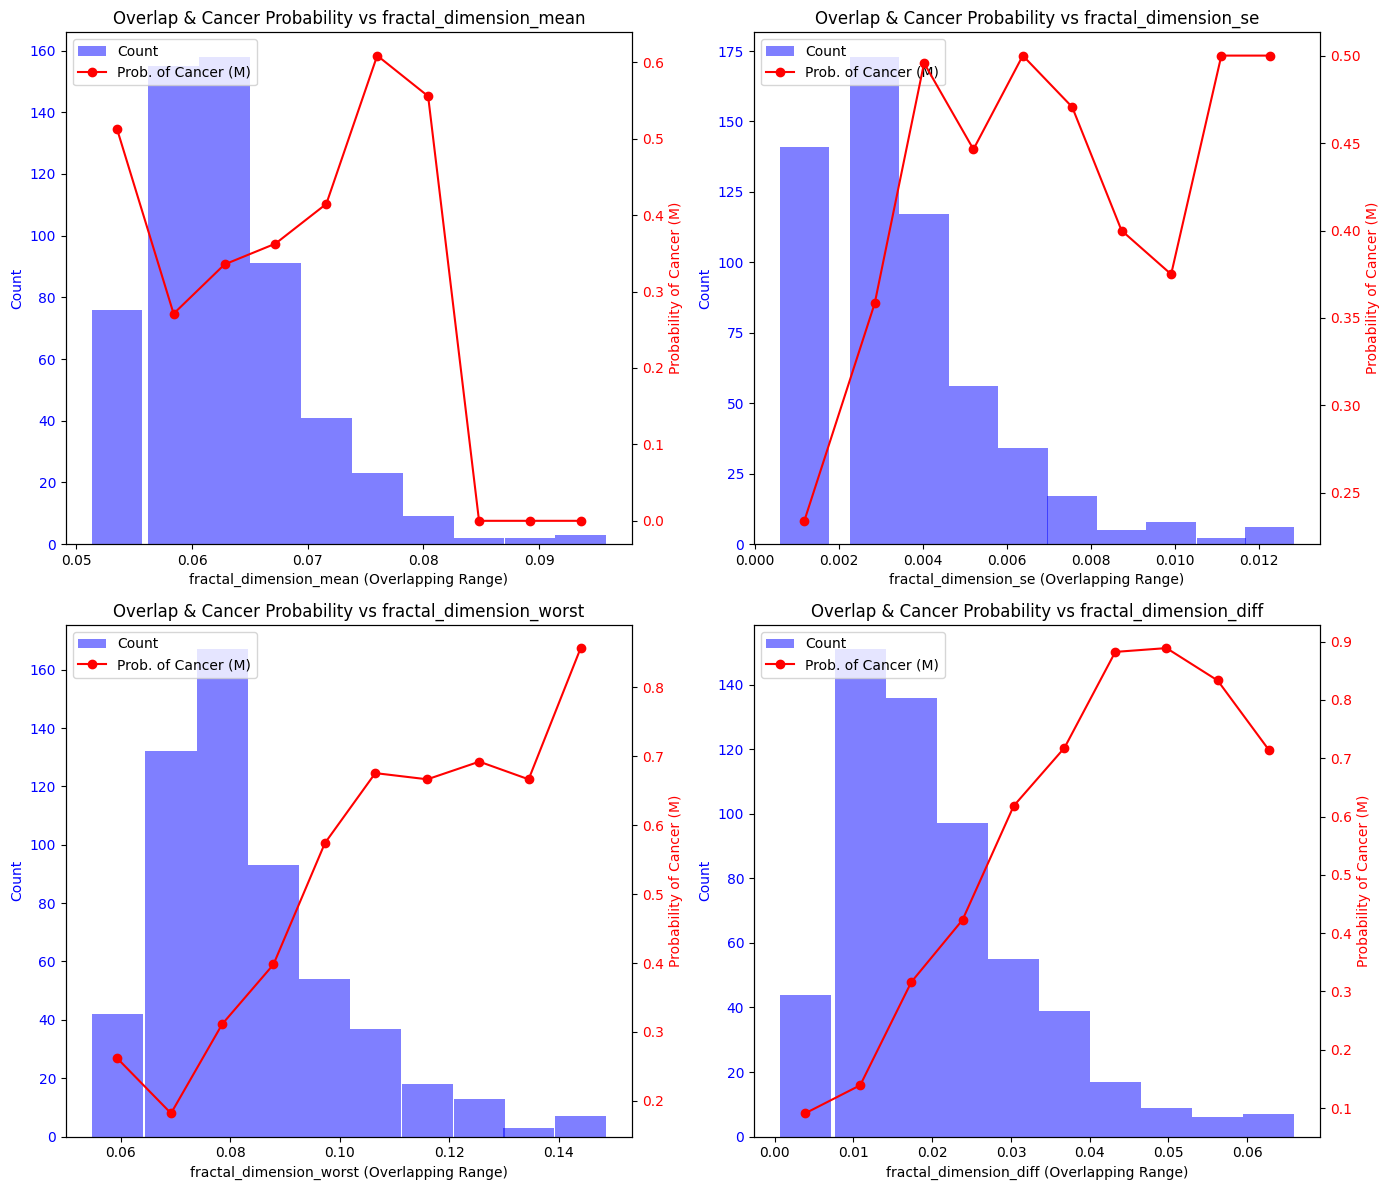

In [7]:
#  2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# loop over each fractal_dimension variable
for i, var in enumerate(fractal_dimension_vars):
    
    # determine the overlapping range for the variable
    min_overlap = max(df_M[var].min(), df_B[var].min())
    max_overlap = min(df_M[var].max(), df_B[var].max())
    
    # Filter the DataFrame to the overlapping region
    df_overlap = df_fractal_dimension[(df_fractal_dimension[var] >= min_overlap) & (df_fractal_dimension[var] <= max_overlap)].copy()
    
    # create 10 evenly spaced bins in the overlapping range
    bins = np.linspace(min_overlap, max_overlap, 11)
    df_overlap[var + '_bin'] = pd.cut(df_overlap[var], bins=bins, include_lowest=True)
    
    # calculate counts for each bin and the probability of diagnosis "M"
    bin_counts = df_overlap.groupby(var + '_bin')['diagnosis'].count()
    prob_cancer = df_overlap.groupby(var + '_bin')['diagnosis'].apply(lambda x: (x == 'M').sum() / len(x))
    print(prob_cancer)

    # Calculate bin centers and bin width
    bin_centers = [interval.mid for interval in bin_counts.index.categories]
    bin_width = bins[1] - bins[0]
    
    # plot on the current subplot
    ax = axes[i]
    # histogram (bar chart) for counts on primary y-axis (blue)
    ax.bar(bin_centers, bin_counts, width=bin_width, alpha=0.5, color='blue', label='Count')
    ax.set_xlabel(f"{var} (Overlapping Range)")
    ax.set_ylabel("Count", color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_title(f"Overlap & Cancer Probability vs {var}")
    
    # create a secondary y-axis for the probability curve (red)
    ax2 = ax.twinx()
    ax2.plot(bin_centers, prob_cancer.values, marker='o', linestyle='-', color='red', label='Prob. of Cancer (M)')
    ax2.set_ylabel("Probability of Cancer (M)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('plots/histo_overlap_fractal.png')
plt.show()


### Boxplot overview of 4 fractal dimension metrics

C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\256316660.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_fractal_dimension,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\256316660.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_fractal_dimension,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\256316660.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_fractal_dimension,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_5124\256316660.py:8

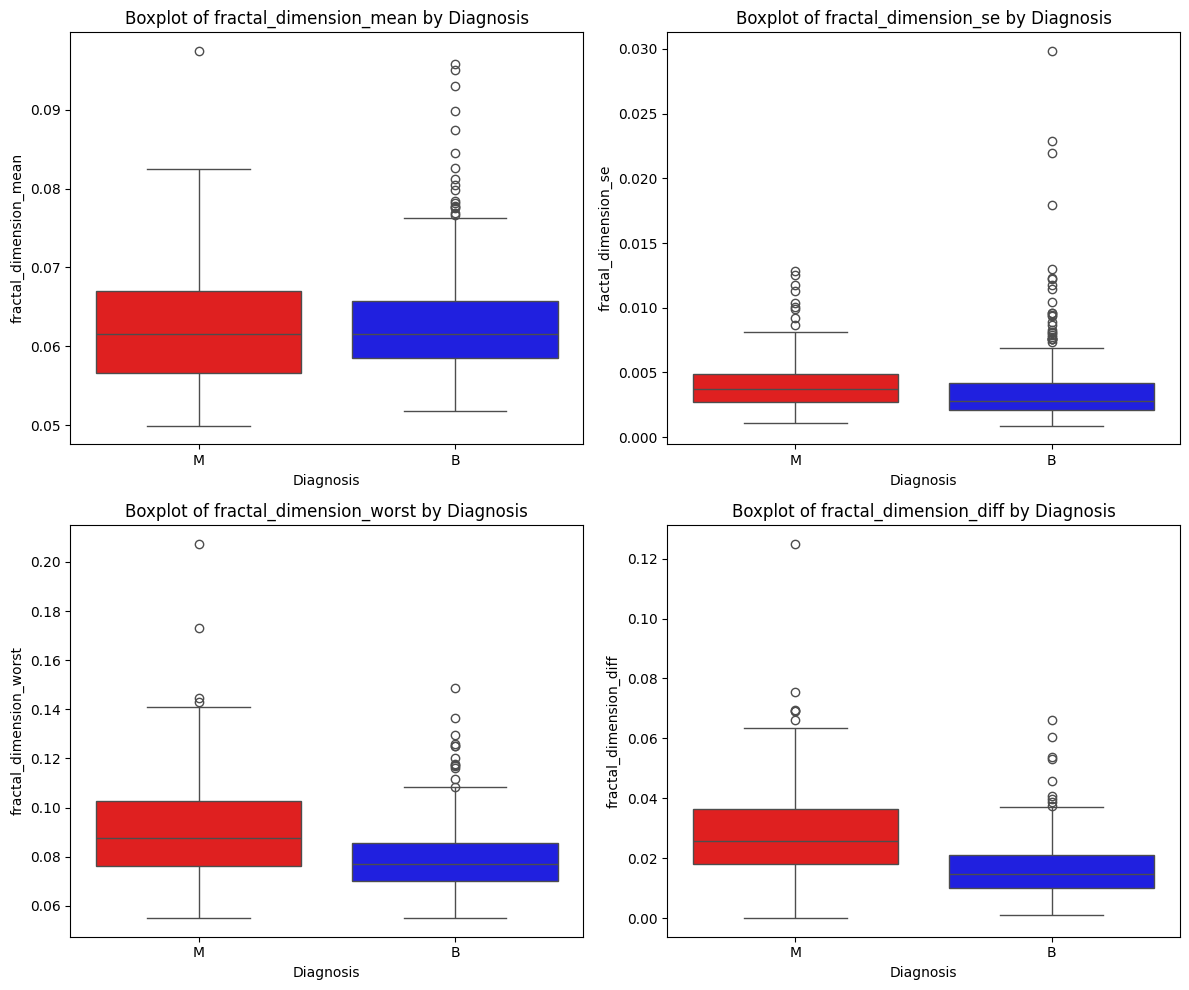

In [8]:
# create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # flatten the axes array so each element is an Axes instance

# loop over each variable and generate a boxplot
for i, var in enumerate(fractal_dimension_vars):
    ax = axes[i]
    sns.boxplot(x='diagnosis', y=var, data=df_fractal_dimension,
                palette={'M': 'red', 'B': 'blue'}, ax=ax)
    ax.set_title(f"Boxplot of {var} by Diagnosis")
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel(var)

plt.tight_layout()
plt.savefig('plots/boxplt_fractal.png')
plt.show()


### Pearson's correlation for fractal dimension_mean, fractal dimension_se, fractal dimension_worst and fractal dimension_diff with diagnosis

In [9]:
df_fractal_dimension['diagnosis_numeric'] = df_fractal_dimension['diagnosis'].map({'B': 0, 'M': 1})

# dictionary for correlation results
results = {}

for col in fractal_dimension_vars:
    r, p = pearsonr(df_fractal_dimension['diagnosis_numeric'], df_fractal_dimension[col])
    results[col] = {'p-value': p, 'r-Pearson': r}

results_df = pd.DataFrame(results).T
print(results_df)


                              p-value  r-Pearson
fractal_dimension_mean   7.599368e-01  -0.012838
fractal_dimension_se     6.307355e-02   0.077972
fractal_dimension_worst  2.316432e-15   0.323872
fractal_dimension_diff   1.181986e-28   0.442303


Fractal dimension difference is the close(and the closest out of 4) to 0. This suggests that the observed correlation is unlikely to be due to random chance, meaning we have an evidence to reject the null hypothesis, implying a statistically significant linear relationship between the diagnosis and the fractal dimension difference variable.

### Chi-Square for the overlapping region for diagnosis and fractal_dimension mean

Let's pick the fractal_dimension metric with the smallest p-value and calculate its Chi-Square p-value.

Since the fractal_dimension is a continues numeric data, first converting it into discrete values within the overlapping region using binning technique and then calculating p-value of Chi-Square

In [10]:
# determining overlapping range
min_overlap = max(df_M['fractal_dimension_diff'].min(), df_B['fractal_dimension_diff'].min())
max_overlap = min(df_M['fractal_dimension_diff'].max(), df_B['fractal_dimension_diff'].max())

df_overlap = df_fractal_dimension[(df_fractal_dimension['fractal_dimension_diff'] >= min_overlap) & (df_fractal_dimension['fractal_dimension_diff'] <= max_overlap)]

# bins for the overlapping region (10 bins)
bins = np.linspace(min_overlap, max_overlap, 11)
df_overlap = df_overlap.copy()  # avoid SettingWithCopyWarning
df_overlap['fractal_dimension_bin'] = pd.cut(df_overlap['fractal_dimension_diff'], bins=bins, include_lowest=True)


contingency_table = pd.crosstab(df_overlap['fractal_dimension_bin'], df_overlap['diagnosis'])
print(contingency_table)


_,pvalue, _, _ = chi2_contingency(contingency_table)
cramer_v = association(contingency_table, method='cramer')
print(f'Chi-Square p-value is: {pvalue}\nCramer V is: {cramer_v}')


diagnosis                            B   M
fractal_dimension_bin                     
(0.00011999999999999988, 0.00761]   40   4
(0.00761, 0.0141]                  130  21
(0.0141, 0.0206]                    93  43
(0.0206, 0.0271]                    56  41
(0.0271, 0.0336]                    21  34
(0.0336, 0.04]                      11  28
(0.04, 0.0465]                       2  15
(0.0465, 0.053]                      1   8
(0.053, 0.0595]                      1   5
(0.0595, 0.066]                      2   5
Chi-Square p-value is: 6.736449671144565e-23
Cramer V is: 0.47453639077157383


Although the chi-square test produced a statistically significant p-value, the corresponding Cramér's V value remained below 0.5. This suggests that the fractal-dimension metric does not exhibit a strong correlation or association relative to the other metrics under evaluation.